https://www.kaggle.com/datasets/mirichoi0218/insurance

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd


In [4]:
ad = pd.read_csv("insurance.csv",)
df = ad.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df.shape

(1338, 7)

# Simple Linear Regression:

In [2]:
from sklearn.linear_model import LinearRegression


In [5]:
X = df[["bmi"]]
y = df["charges"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_


1192.937208961137

In [6]:
model.coef_

array([393.8730308])

In [7]:
model.score(X,y)


0.03933913991786264

In [8]:
model.predict(X)[0:10]

array([12181.99476821, 14494.02945899, 14190.74722528, 10135.82437322,
       12567.99033839, 11331.22902169, 14364.05135883, 12118.97508328,
       12942.16971765, 11370.61632477])

In [9]:
y[0:10]


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [10]:
model = reg.fit(X, y)

In [11]:
model.predict([[30]])


/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13009.12813288])

In [13]:
new_data = [[28],[30],[32]]

In [14]:
model.predict(new_data)

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12221.38207129, 13009.12813288, 13796.87419448])

In [25]:
y_true = y[0:10]
y_pred = reg.predict(X)[0:10]

In [30]:
linear_r2 = r2_score(y_true, y_pred)
linear_r2

-0.29188156510030816

In [31]:
linear_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
linear_rmse

9824.581712159721

# Multiple Linear Regression

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [40]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [45]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
df_encoded = df_encoded.astype(int)

# Create new columns is_north and is_west
df_encoded['is_north'] = df['region'].isin(['northeast', 'northwest']).astype(int)
df_encoded['is_west'] = df['region'].isin(['northwest', 'southwest']).astype(int)

# Drop unnecessary columns
df_encoded.drop(['sex_male', 'smoker_no', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1, inplace=True)

df_encoded

,age,bmi,children,charges,sex_female,smoker_yes,is_north,is_west
0,19,27,0,16884,1,1,0,1
1,18,33,1,1725,0,0,0,0
2,28,33,3,4449,0,0,0,0
3,33,22,0,21984,0,0,1,1
4,32,28,0,3866,0,0,1,1
...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,0,0,1,1
1334,18,31,0,2205,1,0,1,0
1335,18,36,0,1629,1,0,0,0
1336,21,25,0,2007,1,0,0,1


In [46]:
df = df_encoded
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [47]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [48]:
model.intercept_


-12329.877728857562

In [49]:
model.coef_


array([ 2.57155737e+02,  3.34560942e+02,  4.27241945e+02,  1.76810564e+01,
        2.36533007e+04,  5.61490076e+02, -2.57010926e+02])

In [50]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [51]:
multi_r2 = r2_score(y_test, y_pred)
multi_r2

0.7835973017419025

In [52]:
multi_rmse = mean_squared_error(y_test, y_pred, squared=False)
multi_rmse

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5796.220881266894

# Principal Component Regression (PCR)

In [121]:
df = df_encoded
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [122]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [123]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [124]:
X_reduced_train.shape


(1070, 7)

In [125]:
X_reduced_train[:,0]


array([-2.01245162, -0.92962228,  0.39280656, ..., -0.62016639,
        2.311582  ,  0.5737351 ])

In [126]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:7] 


array([ 18.19,  34.21,  49.43,  63.43,  76.95,  89.67, 100.  ])

It is decided to use all the columns to represent the whole data.

In [127]:
lm = LinearRegression()

In [128]:
pcr_model = lm.fit(X_reduced_train, y_train)


In [129]:
pcr_model.intercept_


13345.596261682243

In [130]:
pcr_model.coef_


array([2393.94414097, 3705.02677994, 5100.52001553, 1105.25848564,
       1868.07760524, 7590.52184779, 1069.44808842])

In [131]:
y_pred = pcr_model.predict(X_test)

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [132]:
pcr_r2 = r2_score(y_test, y_pred)
pcr_r2

-310.4822227362906

In [133]:
pcr_rmse = mean_squared_error(y_test, y_pred, squared=False)
pcr_rmse

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


219902.52895642034

## Model Tuning

In [104]:
from sklearn import model_selection


In [105]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [106]:
RMSE = []
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

/var/folders/m7/snhszr993kscmjx9dwlff1lm0000gn/T/ipykernel_37412/1891518475.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
/var/folders/m7/snhszr993kscmjx9dwlff1lm0000gn/T/ipykernel_37412/1891518475.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
/var/folders/m7/snhszr993kscmjx9dwlff1lm0000gn/T/ipykernel_37412/1891518475.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
/var/folders/m7/snhszr993kscmjx9dwlff1lm0000gn/T/ipykernel_37412/1891518475.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy

In [107]:
import matplotlib.pyplot as plt


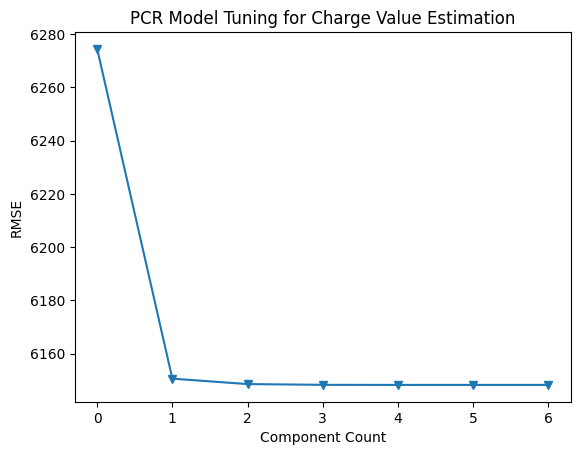

In [113]:
plt.plot(RMSE, '-v')
plt.xlabel('Component Count')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning for Charge Value Estimation');


We understand that using all principal components result much lower RMSE so we do not change our model.

# Partial Least Squares (PLS)

In [73]:
df = df_encoded
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [74]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD


In [75]:
pls_model = PLSRegression().fit(X_train, y_train)


In [76]:
pls_model.coef_


array([[3604.98081455, 1914.77315322,  588.82905424,  -57.87070418,
        9581.81522751,  285.65429806, -157.28673412]])

In [79]:
y_pred = pls_model.predict(X_test)

In [80]:
pls_r2 = r2_score(y_test, y_pred)
pls_r2

0.7837916474044213

In [81]:
pls_rmse = mean_squared_error(y_test, y_pred, squared=False)
pls_rmse

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5793.617578666115

## Model Tuning

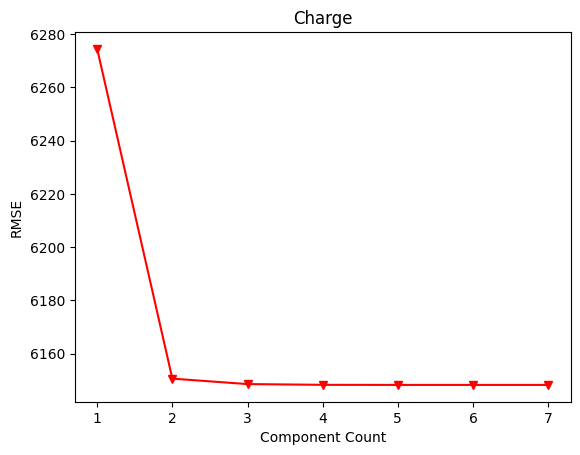

In [112]:
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)


plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Component Count')
plt.ylabel('RMSE')
plt.title('Charge');

# Ridge Regression

In [82]:
df = df_encoded
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [83]:
from sklearn.linear_model import Ridge


In [84]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)


In [85]:
ridge_model.coef_


array([ 2.57136212e+02,  3.34548448e+02,  4.27296330e+02,  1.68853368e+01,
        2.36396222e+04,  5.61046301e+02, -2.57523534e+02])

In [86]:
y_pred = ridge_model.predict(X_test)

In [87]:
ridge_r2 = r2_score(y_test, y_pred)
ridge_r2

0.7835688198444615

In [88]:
ridge_rmse = mean_squared_error(y_test, y_pred, squared=False)
ridge_rmse

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5796.602304276791

# Lasso Regression

In [89]:
df = df_encoded
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [90]:
from sklearn.linear_model import Lasso


In [91]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)


In [92]:
lasso_model.coef_


array([ 2.57154739e+02,  3.34551971e+02,  4.27174875e+02,  1.72327002e+01,
        2.36526659e+04,  5.61049051e+02, -2.56641487e+02])

In [93]:
y_pred = model.predict(X_test)

In [94]:
lasso_r2 = r2_score(y_test, y_pred)
lasso_r2

0.7835973017419025

In [95]:
lasso_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasso_rmse

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5796.220881266894

# Elasticnet Regression

In [96]:
df = df_encoded
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [97]:
from sklearn.linear_model import ElasticNet


In [98]:
enet_model = ElasticNet().fit(X_train, y_train)


In [99]:
enet_model.coef_


array([ 230.76770394,  322.24968469,  396.98280203, -336.62782952,
       5800.30045445,   93.41980947, -345.58210462])

In [100]:
enet_model.intercept_


-6772.233423238806

In [101]:
y_pred = enet_model.predict(X_test)


In [102]:
enet_r2 = r2_score(y_test, y_pred)
enet_r2

0.41771256716470506

In [103]:
enet_rmse = mean_squared_error(y_test, y_pred, squared=False)
enet_rmse

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9507.849527182938

# Result

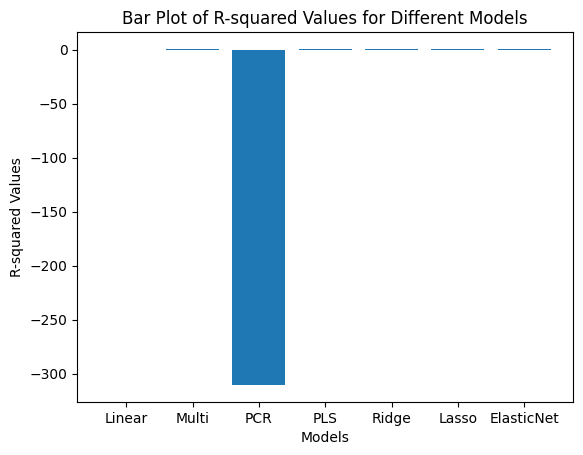

In [116]:
# Define the variables and their values
variables = ['Linear', 'Multi', 'PCR', 'PLS', 'Ridge', 'Lasso', 'ElasticNet']
values = [linear_r2, multi_r2, pcr_r2, pls_r2, ridge_r2, lasso_r2, enet_r2]  # Example values for each variable

plt.bar(variables, values)

plt.xlabel('Models')
plt.ylabel('R-squared Values')
plt.title('Bar Plot of R-squared Values for Different Models')

plt.show()


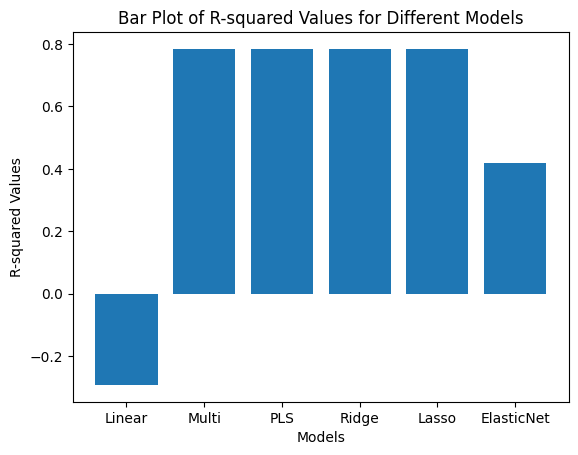

In [118]:
# Define the variables and their values
variables = ['Linear', 'Multi', 'PLS', 'Ridge', 'Lasso', 'ElasticNet']
values = [linear_r2, multi_r2, pls_r2, ridge_r2, lasso_r2, enet_r2]  # Example values for each variable

plt.bar(variables, values)

plt.xlabel('Models')
plt.ylabel('R-squared Values')
plt.title('Bar Plot of R-squared Values for Different Models')

plt.show()

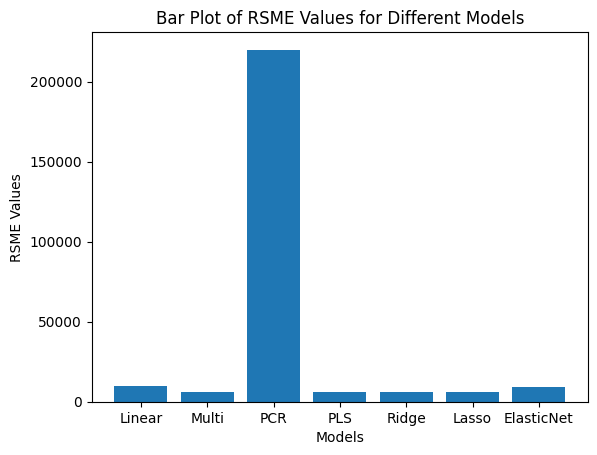

In [117]:
# Define the variables and their values
variables = ['Linear', 'Multi', 'PCR', 'PLS', 'Ridge', 'Lasso', 'ElasticNet']
values = [linear_rmse, multi_rmse, pcr_rmse, pls_rmse, ridge_rmse, lasso_rmse, enet_rmse]  # Example values for each variable

plt.bar(variables, values)

plt.xlabel('Models')
plt.ylabel('RSME Values')
plt.title('Bar Plot of RSME Values for Different Models')

plt.show()

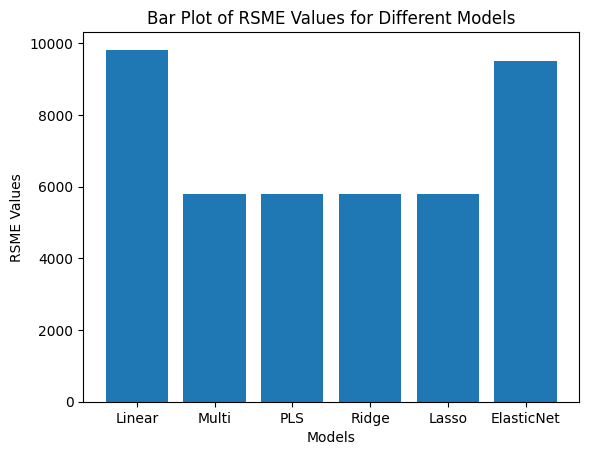

In [119]:
# Define the variables and their values
variables = ['Linear', 'Multi', 'PLS', 'Ridge', 'Lasso', 'ElasticNet']
values = [linear_rmse, multi_rmse, pls_rmse, ridge_rmse, lasso_rmse, enet_rmse]  # Example values for each variable

plt.bar(variables, values)

plt.xlabel('Models')
plt.ylabel('RSME Values')
plt.title('Bar Plot of RSME Values for Different Models')

plt.show()

In [120]:
print(linear_r2, multi_r2, pls_r2, ridge_r2, lasso_r2, enet_r2)

-0.29188156510030816 0.7835973017419025 0.7837916474044213 0.7835688198444615 0.7835973017419025 0.41771256716470506
